# Figure 3

> 25,000-year simulation of the Earth's orbital decay and engulfment due to dissipative tidal interactions with the Sun.  Shown in subplot **(a)**, $a(t)_\textrm{pred}$ and $a(t)_\textrm{sim}$ respectively are the predicted (dotted green) and simulated (solid blue) evolutions of Earth's semi-major axis; the solar radius (dashed orange), $R(t) = 0.85$, is constant throughout.  Subplot **(b)** shows the Earth's orbital eccentricity dampening over time due to tides, when initialized to $e_{\oplus} = 0.03$ in a similar setup.

For more information and additional explanation of the code in this notebook, see the official REBOUNDx effect example documentation for ["Tides Constant Time Lag"](https://github.com/dtamayo/reboundx/blob/master/ipython_examples/TidesConstantTimeLag.ipynb).

## Setup #1

In [1]:
import rebound
import reboundx
import numpy as np

def getsim(e = 0.):                           # pass Earth's init. eccentricity
    sim = rebound.Simulation()
    sim.units = ('yr', 'AU', 'Msun') 
    sim.add(m=0.86)                           # post-MS Sun
    sim.add(m=3.e-6, a=1., e=e)               # Earth w/ passed eccentricity
    sim.move_to_com()
    rebx = reboundx.Extras(sim)
    tides = rebx.load_force("tides_constant_time_lag")
    rebx.add_force(tides)
    return sim, rebx, tides

In [2]:
sim, rebx, tides = getsim()
ps = sim.particles
ps[0].r = 0.85 # AU
ps[0].params["tctl_k1"] = 0.03
ps[0].params["tctl_tau"] = 0.4
ps[0].params["Omega"] = 0 # explicitly set to 0 (would be 0 by default)

## Run #1

In [3]:
%%time
tmax = 2.5e4
Nout = 1000
a = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
R0 = 0*times + ps[0].r # to plot physical radius of the Sun
q = (ps[1].m/ps[0].m)
T = ps[0].r**3/sim.G/ps[0].m/ps[0].params["tctl_tau"]
apred = ps[0].r*((ps[1].a/ps[0].r)**8 - 48.*ps[0].params["tctl_k1"]*q*(1+q)*times/T)**(1./8.)

for i, time in enumerate(times):
    sim.integrate(time)
    a[i] = ps[1].a

CPU times: user 7.83 s, sys: 0 ns, total: 7.83 s
Wall time: 7.83 s


## Setup #2
Our second setup sets a slight initial eccentricity for Earth.

In [4]:
sim, rebx, tides = getsim(e = 0.03)
ps = sim.particles
ps[0].r = 0.85 # AU
ps[0].params["tctl_k1"] = 0.03
ps[0].params["tctl_tau"] = 0.4
ps[0].params["Omega"] = 0 # explicitly set to 0 (would be 0 by default)

## Run #2

In [5]:
%%time
e = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    e[i] = ps[1].e

CPU times: user 9.81 s, sys: 0 ns, total: 9.81 s
Wall time: 9.81 s


## Plot

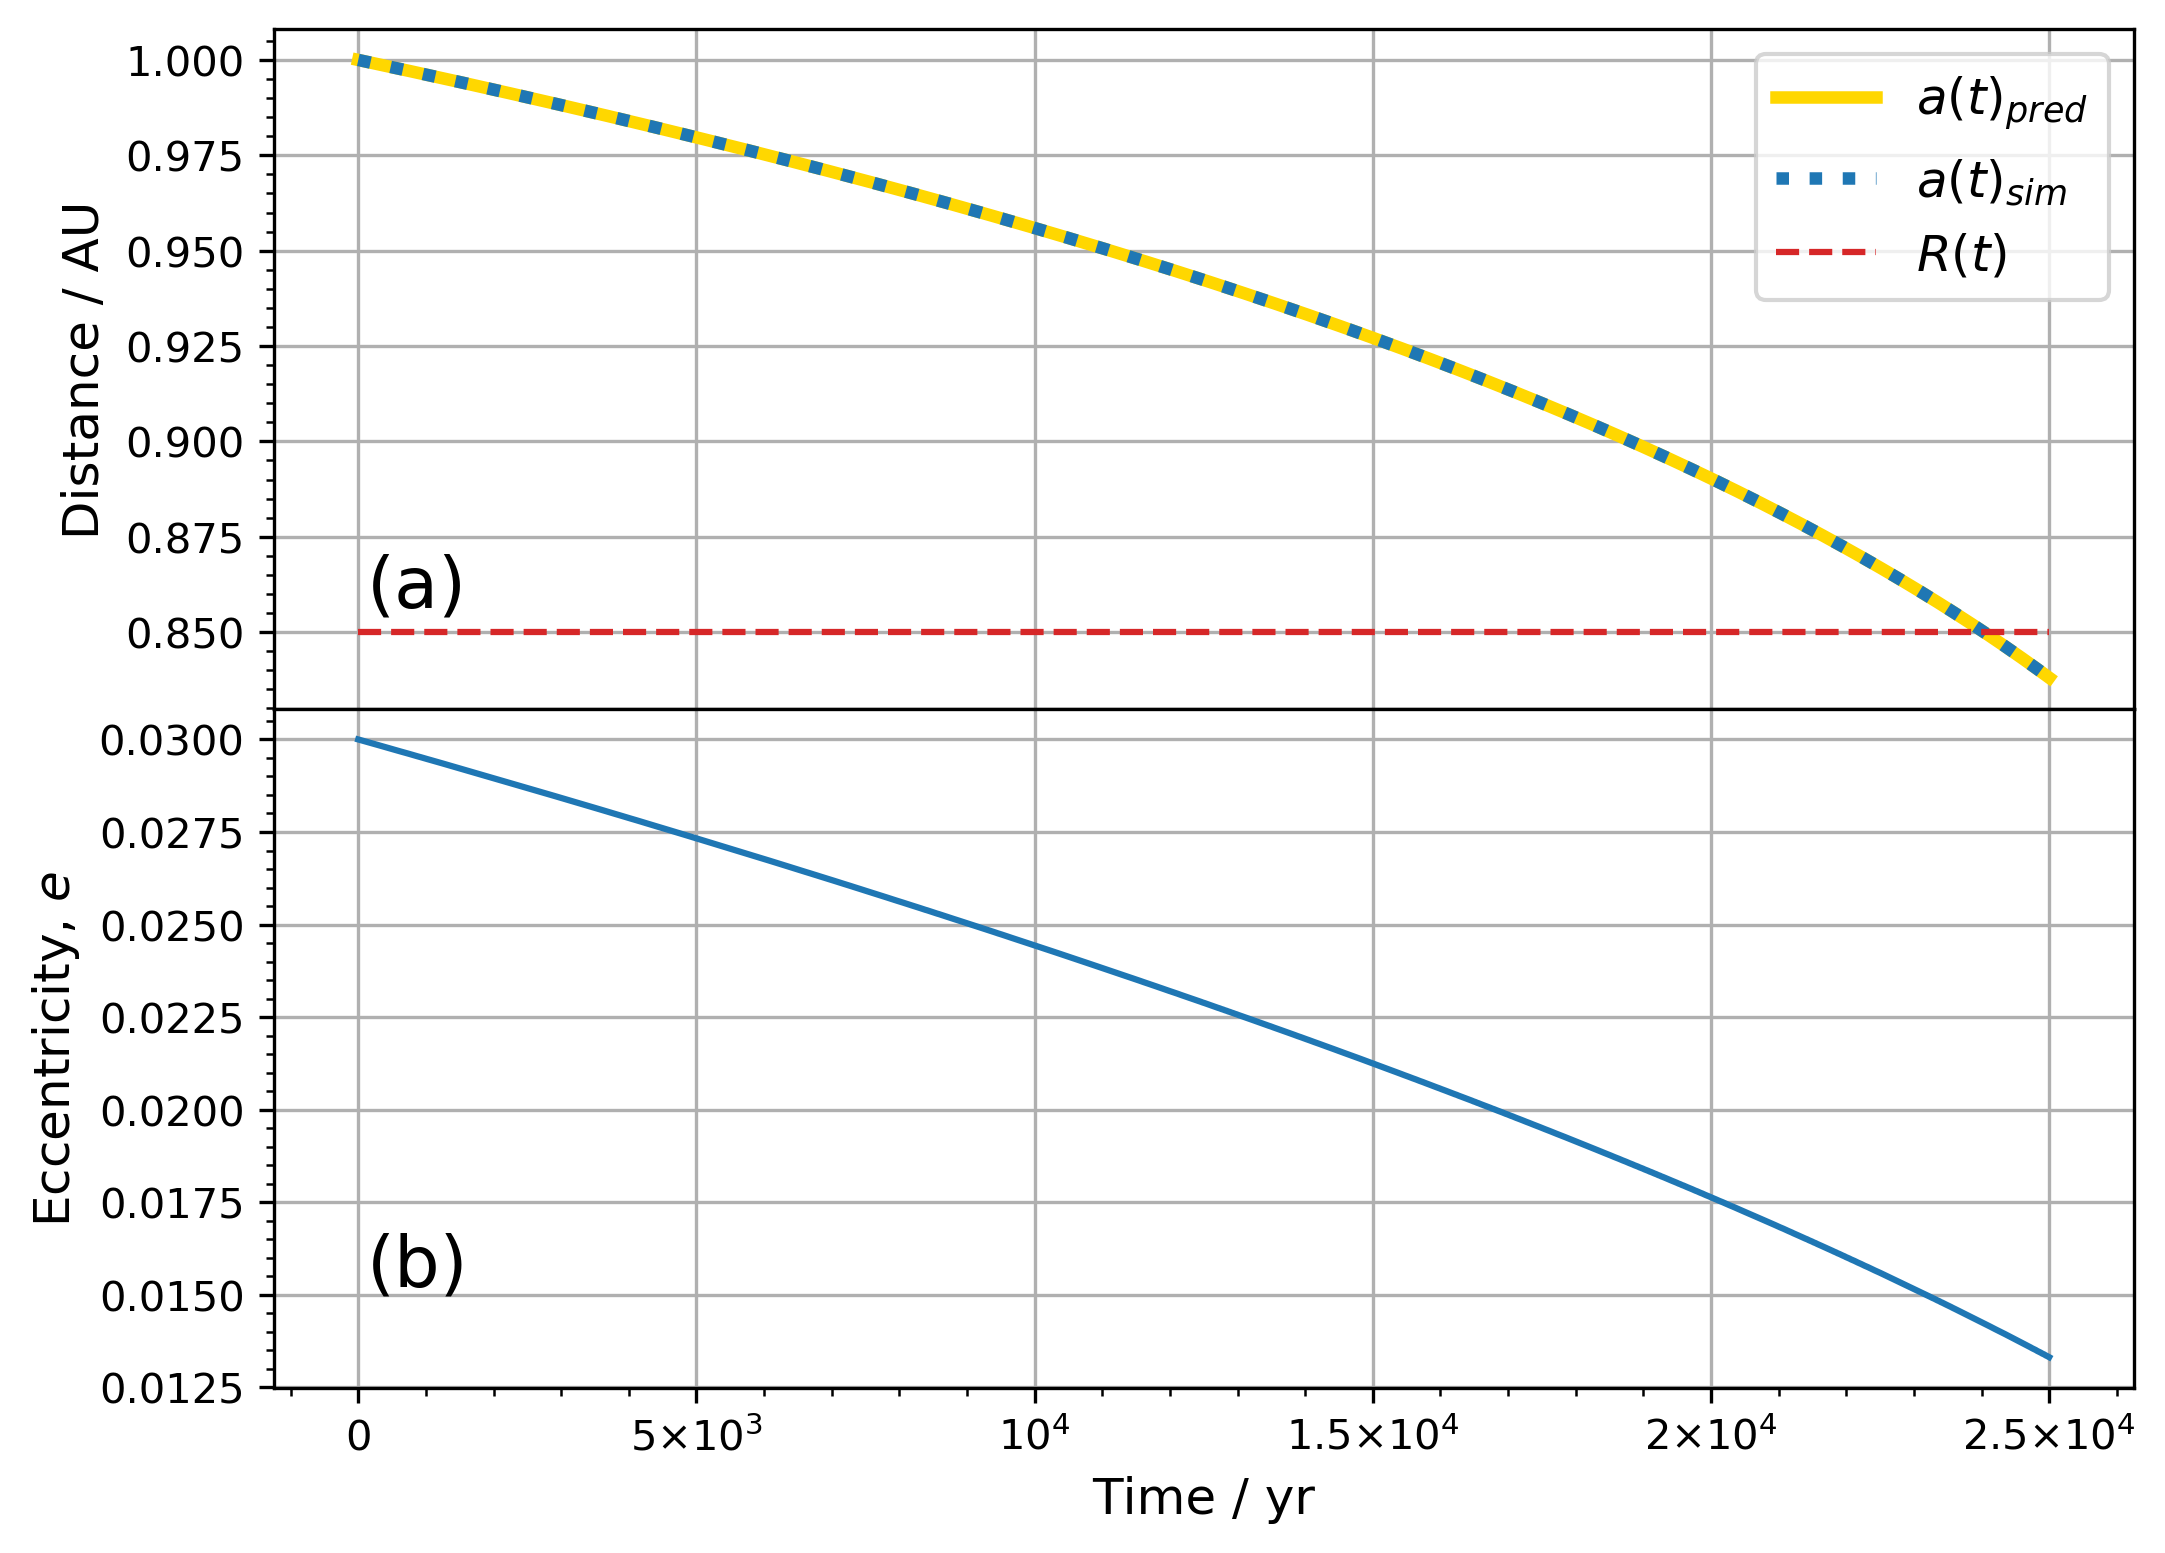

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6), dpi=300)
fig.subplots_adjust(hspace=0)

ax1.plot(times, apred, lw=3, color='gold', label='$a(t)_{pred}$')
ax1.plot(times, a, ':', lw=3, color='tab:blue', label='$a(t)_{sim}$')
ax1.plot(times, R0, '--', color='tab:red', label='$R(t)$')
ax1.set_ylabel('Distance / AU', fontsize='large')
ax1.legend(fontsize='large', loc='best')
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.text(0.05, 0.23, '(a)', transform=ax1.transAxes, fontsize='xx-large',
        verticalalignment='top')
ax1.grid()

ax2.set_xlabel('Time / yr', fontsize='large')
ax2.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
ax2.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_ylabel('Eccentricity, $e$', fontsize='large')
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.plot(times, e)
ax2.text(0.05, 0.23, '(b)', transform=ax2.transAxes, fontsize='xx-large',
        verticalalignment='top')
ax2.grid()

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.savefig('img/fig3.png')